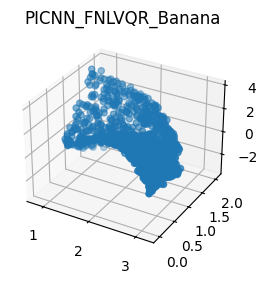

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import PICNN_FNLVQR_Banana

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = PICNN_FNLVQR_Banana(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], Y[:, 0], Y[:, 1])
ax.set_title("PICNN_FNLVQR_Banana")

plt.show()

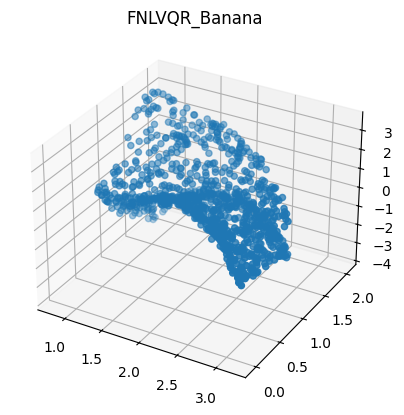

In [2]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import FNLVQR_Banana

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Banana(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], Y[:, 0], Y[:, 1],)
ax.set_title("FNLVQR_Banana")
plt.show()

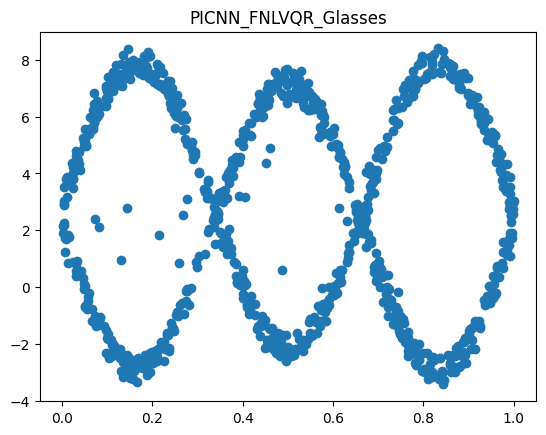

In [3]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import PICNN_FNLVQR_Glasses

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = PICNN_FNLVQR_Glasses(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

plt.scatter(X[:, 0], Y[:, 0])
plt.title("PICNN_FNLVQR_Glasses")
plt.show()

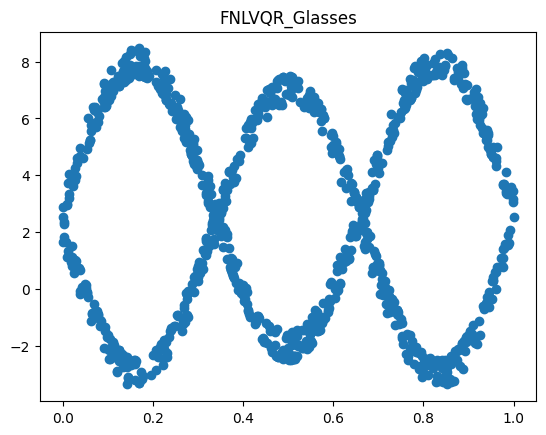

In [4]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import FNLVQR_Glasses

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Glasses(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

plt.scatter(X[:, 0], Y[:, 0])
plt.title("FNLVQR_Glasses")
plt.show()

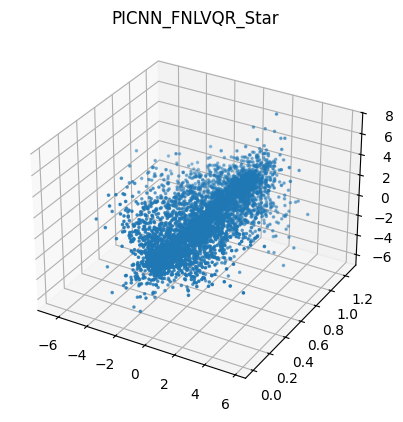

In [11]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import PICNN_FNLVQR_Star

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = PICNN_FNLVQR_Star(tensor_parameters=tensor_parameters, amplitude=1)
X, Y = dataset.sample_joint(n_points=5000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Y[:, 0], X[:, 0], Y[:, 1], s=2.5)
ax.set_title("PICNN_FNLVQR_Star")
plt.show()

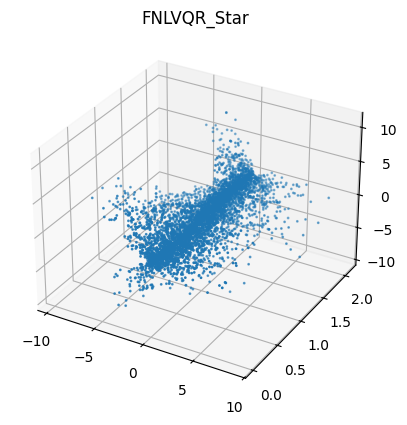

In [12]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import FNLVQR_Star

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Star(tensor_parameters=tensor_parameters, amplitude=2.)
X, Y = dataset.sample_joint(n_points=5000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Y[:, 0], X[:, 0], Y[:, 1], s=1)
ax.set_title("FNLVQR_Star")
plt.show()

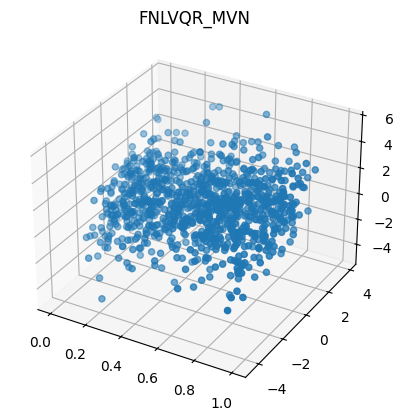

In [13]:
%matplotlib inline
from datasets import FNLVQR_MVN

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_MVN(number_of_responses=2, number_of_features=1, tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(n_points=1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], Y[:, 0], Y[:, 1])
ax.set_title("FNLVQR_MVN")
plt.show()

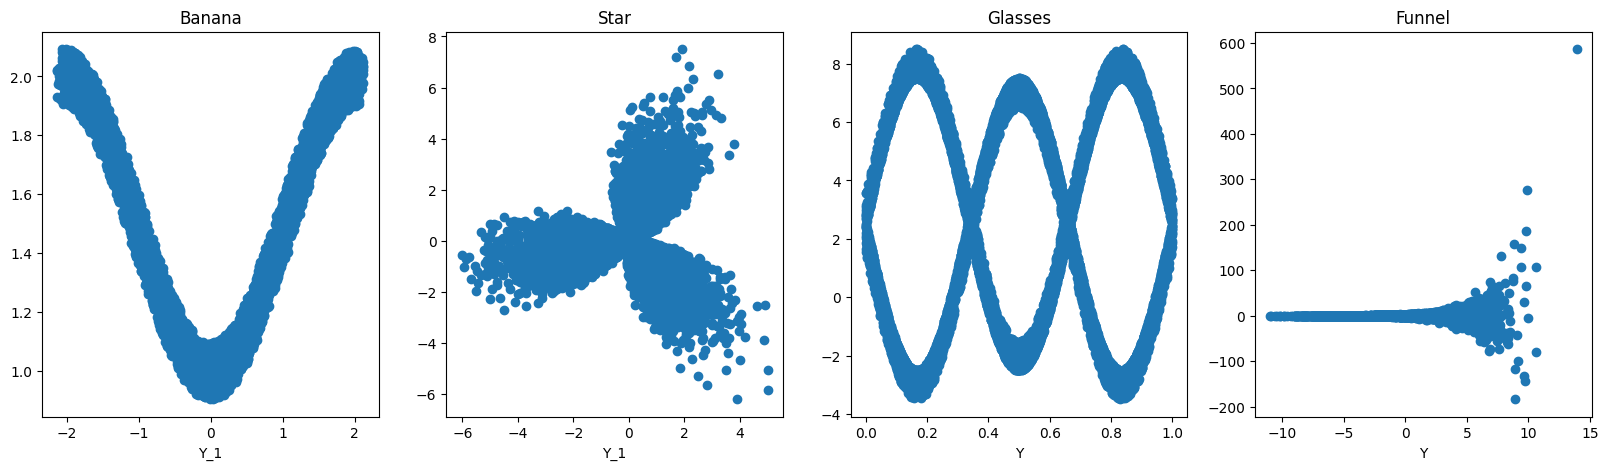

In [14]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from datasets import FNLVQR_Banana, FNLVQR_Glasses, FNLVQR_Star, FunnelDistribution


fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(141)

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Banana(tensor_parameters=tensor_parameters)
X = dataset.sample_covariates(1).repeat(10000, 1)
X, Y = dataset.sample_conditional(X)

ax.scatter(Y[:, 1], Y[:, 0])
ax.set_xlabel("Y_0")
ax.set_xlabel("Y_1")
ax.set_title("Banana")

ax = fig.add_subplot(142)

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Star(tensor_parameters=tensor_parameters)
X = dataset.sample_covariates(1).repeat(10000, 1)
X, Y = dataset.sample_conditional(X)

ax.scatter(Y[:, 1], Y[:, 0])
ax.set_xlabel("Y_0")
ax.set_xlabel("Y_1")
ax.set_title("Star")

ax = fig.add_subplot(143)

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FNLVQR_Glasses(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(10000)

ax.scatter(X[:, 0], Y[:, 0])
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_title("Glasses")

ax = fig.add_subplot(144)

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FunnelDistribution(tensor_parameters=tensor_parameters)
X, Y = dataset.sample_joint(10000)

ax.scatter(X[:, 0], Y[:, 0])
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_title("Funnel")

plt.savefig("images/conditional_datasets.png")
plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import torch

def plot_density_heatmap(ax, X, Y, xlim, ylim, bins=100, cmap="viridis",):
    """
    Plot smooth density heatmap of p(X, Y) on a given matplotlib axis.
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis to plot on.
    X, Y : array-like or torch.Tensor
        Input data arrays (1D).
    bins : int
        Grid resolution for KDE.
    cmap : str
        Colormap for heatmap.
    """
    # Convert torch.Tensor to numpy
    if isinstance(X, torch.Tensor):
        X = X.detach().cpu().numpy()
    if isinstance(Y, torch.Tensor):
        Y = Y.detach().cpu().numpy()

    # Stack for KDE
    values = np.vstack([X, Y])
    kde = gaussian_kde(values)

    # Define grid
    xmin, xmax = xlim
    ymin, ymax = ylim
    Xgrid, Ygrid = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
    positions = np.vstack([Xgrid.ravel(), Ygrid.ravel()])
    Z = np.reshape(kde(positions).T, Xgrid.shape)

    im = ax.imshow(
        np.rot90(Z),
        extent=[xmin, xmax, ymin, ymax],
        cmap=cmap,
        aspect="auto"
    )
    return im

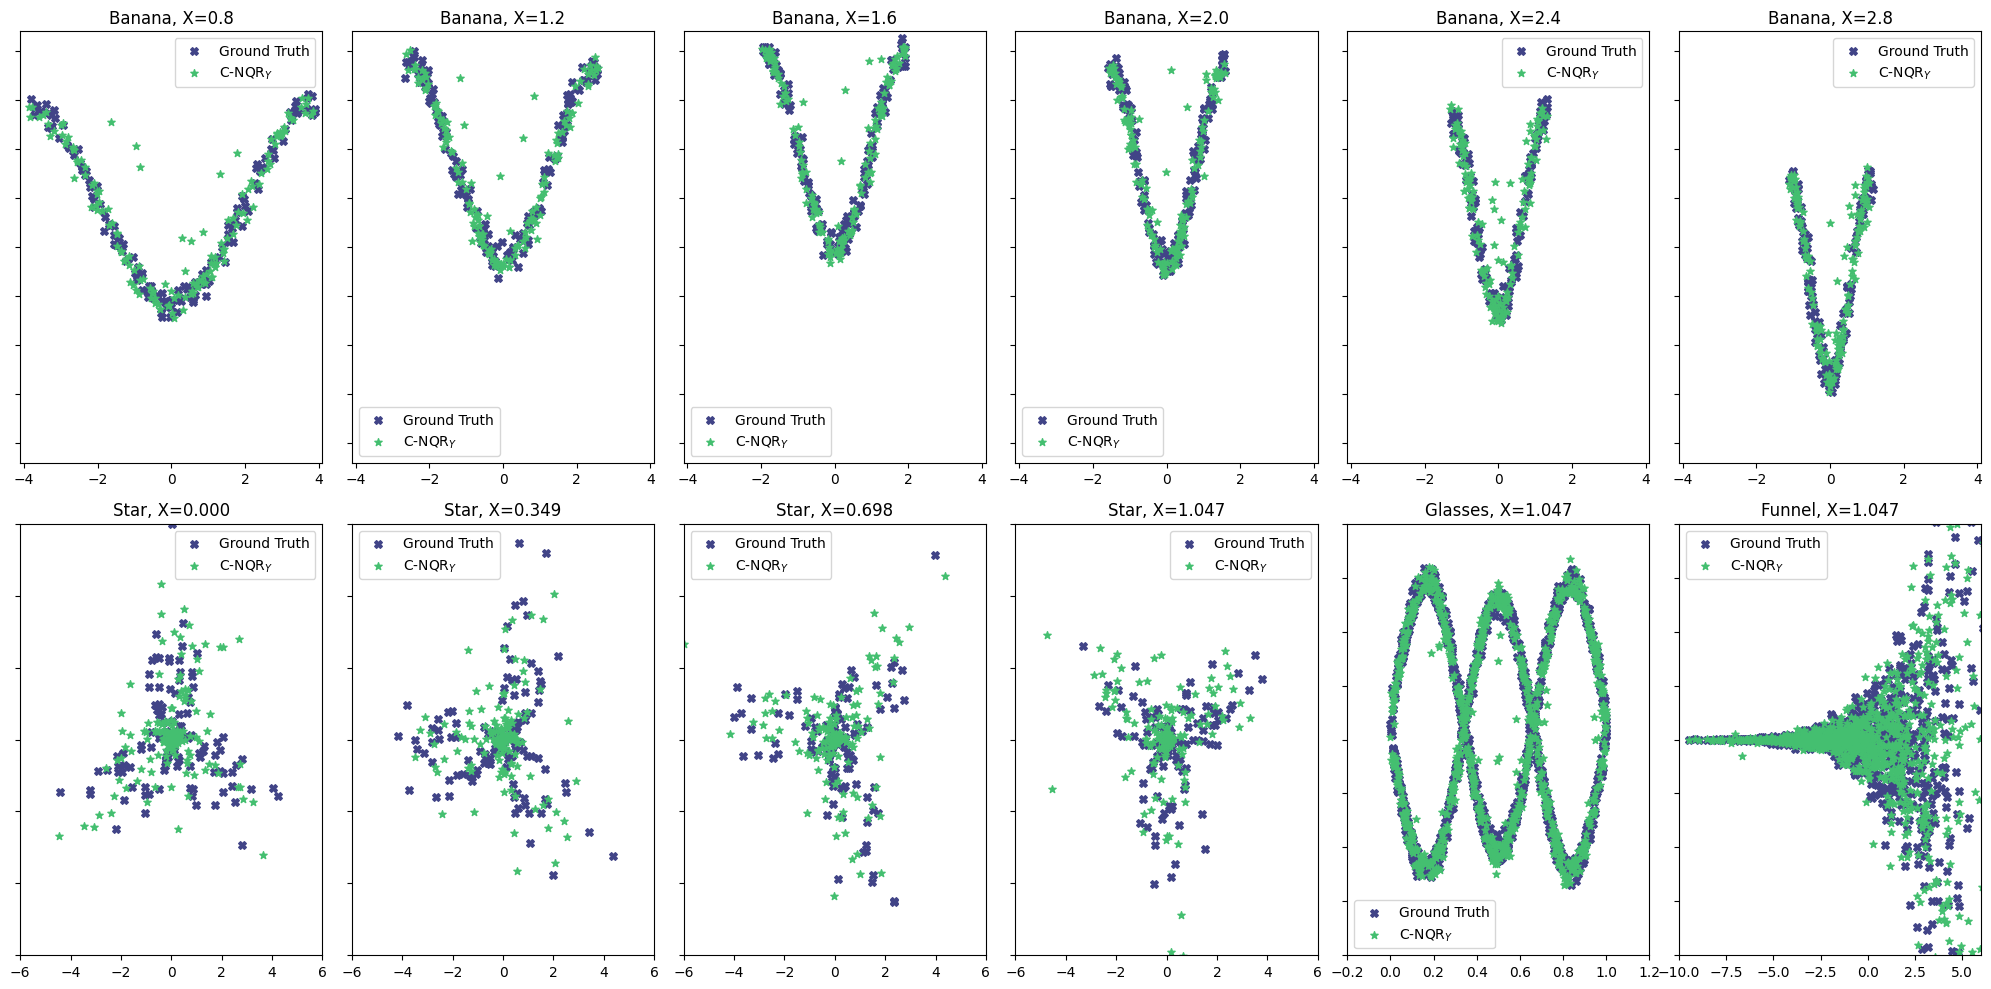

In [59]:
%matplotlib inline
import torch
import matplotlib
import matplotlib.pyplot as plt
from pushforward_operators.neural_quantile_regression.amortized_neural_quantile_regression import AmortizedNeuralQuantileRegression
from utils.quantile import get_quantile_level_analytically
from pushforward_operators import EntropicNeuralQuantileRegression, NeuralQuantileRegression, ConvexPotentialFlow
from datasets import FNLVQR_Banana, FNLVQR_Glasses, FNLVQR_Star, FunnelDistribution

color_map = matplotlib.colormaps['viridis']
tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))

model = NeuralQuantileRegression.load_class("../../experiments_full_16_09_2025/fnlvqr_banana/neural_quantile_regression_u/weights.pth")
model.to(**tensor_parameters)

size = 30
epsilon = 0.1
xlim=(-4-epsilon, 4+epsilon)
ylim=(0-epsilon, 2+epsilon)
number_of_points_to_sample = 150

interpolants = 6

dataset = FNLVQR_Banana(tensor_parameters=tensor_parameters)

fig = plt.figure(figsize=(20, 10))

for i in range(interpolants):
    ax = fig.add_subplot(2, interpolants, i + 1)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    conditional_value = 0.8 + (2.4 * (i / interpolants))
    X = torch.tensor([[conditional_value]]).repeat(number_of_points_to_sample, 1).to(**tensor_parameters)
    X, Y = dataset.sample_conditional(X)
    U = torch.randn_like(Y)
    Y_approximated = model.push_u_given_x(U, X)

    ax.scatter(Y[:, 1], Y[:, 0], s=size, color=color_map(0.2), marker="X", label="Ground Truth")
    ax.scatter(Y_approximated[:, 1], Y_approximated[:, 0], s=size, color=color_map(0.7), marker="*", label="C-NQR$_Y$")
    ax.legend()
    ax.set_title(f"Banana, X={conditional_value}")
    ax.tick_params(labelleft=False)


dataset = FNLVQR_Star(tensor_parameters=tensor_parameters)
model = NeuralQuantileRegression.load_class("../../experiments_full_16_09_2025/fnlvqr_star/neural_quantile_regression_u/weights.pth")
model.to(**tensor_parameters)
xlim = (-6, 6)
ylim = (-6, 6)

for i in range(interpolants-2):
    ax = fig.add_subplot(2, interpolants, interpolants + i + 1)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    conditional_value =  (2 * torch.pi / 3) * (i / interpolants)
    X = torch.tensor([[conditional_value]]).repeat(number_of_points_to_sample, 1).to(**tensor_parameters)
    X, Y = dataset.sample_conditional(X)
    U = torch.randn_like(Y)
    Y_approximated = model.push_u_given_x(U, X)
    ax.scatter(Y[:, 1], Y[:, 0], s=size, color=color_map(0.2), marker="X", label="Ground Truth")
    ax.scatter(Y_approximated[:, 1], Y_approximated[:, 0], s=size, color=color_map(0.7), marker="*", label="C-NQR$_Y$")
    ax.legend()
    ax.set_title(f"Star, X={conditional_value:.3f}")
    ax.tick_params(labelleft=False)

dataset = FNLVQR_Glasses(tensor_parameters=tensor_parameters)
model = NeuralQuantileRegression.load_class("../../experiments_full_16_09_2025/fnlvqr_glasses/neural_quantile_regression_u/weights.pth")
model.to(**tensor_parameters)
xlim = (-0.2, 1.2)
ylim = (-6, 10)
ax = fig.add_subplot(2, interpolants, interpolants + i + 2)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
conditional_value =  (2 * torch.pi / 3) * (i / interpolants)
X, Y = dataset.sample_joint(1000)
U = torch.randn_like(Y)
Y_approximated = model.push_u_given_x(U, X)

ax.scatter(X.flatten(), Y.flatten(), s=size, color=color_map(0.2), marker="X", label="Ground Truth")
ax.scatter(X.flatten(), Y_approximated.flatten(), s=size, color=color_map(0.7), marker="*", label="C-NQR$_Y$")
ax.legend()
ax.set_title(f"Glasses, X={conditional_value:.3f}")
ax.tick_params(labelleft=False)

dataset = FunnelDistribution(tensor_parameters=tensor_parameters)
model = AmortizedNeuralQuantileRegression.load_class("../../experiments_full_14_09_2025/funnel_1/amortized_neural_quantile_regression_u/weights.pth")
model.to(**tensor_parameters)

xlim = (-10, 6)
ylim = (-10, 10)
ax = fig.add_subplot(2, interpolants, interpolants + i + 3)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
conditional_value =  (2 * torch.pi / 3) * (i / interpolants)
X, Y = dataset.sample_joint(1000)
U = torch.randn_like(Y)
Y_approximated = model.push_u_given_x(U, X)

ax.scatter(X.flatten(), Y.flatten(), s=size, color=color_map(0.2), marker="X", label="Ground Truth")
ax.scatter(X.flatten(), Y_approximated.flatten(), s=size, color=color_map(0.7), marker="*", label="C-NQR$_Y$")
ax.legend()
ax.set_title(f"Funnel, X={conditional_value:.3f}")
ax.tick_params(labelleft=False)

plt.tight_layout()
plt.savefig("images/heatmap.png")
plt.show()

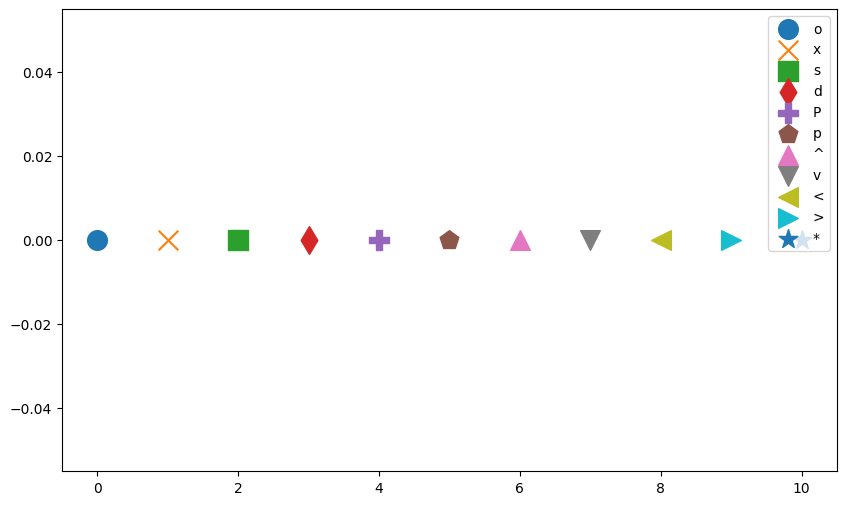

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
markers = ["o", "x", "s", "d", "P", "p", "^", "v", "<", ">", "*"]
for i, m in enumerate(markers):
    ax.scatter(i, 0, s=200, marker=m, label=m)
ax.legend()
plt.show()